In [120]:
import os
import pandas as pd
import tempfile
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kerasbeats import prep_time_series, NBeatsModel
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# from darts.models import NBEATSModel

# from darts import TimeSeries, concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, MaxPool1D, Flatten, Conv2D, MaxPooling2D
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.utils import to_categorical
# from sklearn.metrics import confusion_matrix
# from keras.layers import Bidirectional
# from keras import optimizers
# from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
# from keras.layers import Conv1D, MaxPooling1D, MaxPool1D, Flatten, Conv2D
# import pickle
from sklearn.metrics import fbeta_score
import tensorflow_model_optimization as tfmot
# import keras


In [121]:


# directory = './Data/tinyml_contest_data_training'

# data = {'Subject Number': [],
#         'Label': [],
#         'Index': [],
#         'Bin'  : []}

# df = pd.DataFrame(data)


# rows, cols = (30213, 1251)
# arr = [[0]*cols]*rows
# print('row: ' + str(len(arr)))
# print('col: ' + str(len(arr[0])))
        
        
# print(df)
# # iterate over files in
# # that directory

# filecnt = 0

# for filename in os.scandir(directory):
#     #if filename.is_file():
#         #print(filename.path.replace('DeepLearning_for_ImagingFlowCytometry/data/TinyMl/tinyml_contest_data_training', '', 1))
        
#     filevals = []
        
#     datav2 = pd.read_csv(filename, sep=" ", header=None)
    
#     datav2.columns = [filename]
#     #filevals.append(filename)    
#     for x in datav2[filename]:
#         filevals.append(x)
    
#     arr[filecnt] = filevals  
    
    
    
#     name = filename.path[36:]
#         #filenames[name] = {}
#     sub = name.split('-')[0]
#     lab = name[4:].split('-')[0]
#     ind = int(name.split('-')[2][:-4])
    
#     if lab in ["VT", "VFb"] :
#         bin = 1
#     else:
#         bin = 0
    
#     df2 = {'Subject Number': sub, 'Label': lab, 'Index': ind, 'Bin' : bin}
    
#     df = df.append(df2, ignore_index = True)
    
    
#     #for x in range(len(filevales)):
#      #   arr[filecnt][x] = filevals[x]
    
#     filecnt += 1
    
    
# import numpy

# newnumpy = numpy.array(arr)

# largedf = pd.DataFrame(newnumpy)


# alldf = pd.concat([df, largedf], axis = 1)

# alldf = alldf.sort_values(by=['Subject Number', 'Label', 'Index'], ignore_index = True)
# alldf = alldf.drop(columns=['Label', 'Index', 'Bin'])
# #print(filecnt)

# print(len(arr[0]))

# #print(alldf.head())

# onlylab = df.drop(columns=['Subject Number','Label', 'Index'])

# finaldf = pd.concat([alldf, onlylab], axis = 1)

# # print(finaldf.head())

In [122]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

for d in devices:
    t = d.device_type
    name = d.physical_device_desc
    l = [item.split(':',1) for item in name.split(", ")]
    name_attr = dict([x for x in l if len(x)==2])
    dev = name_attr.get('name', 'Unnamed device')
    print(f" {d.name} || {dev} || {t} || {sizeof_fmt(d.memory_limit)}")

 /device:CPU:0 || Unnamed device || CPU || 256.0 MiB
 /device:XLA_CPU:0 || Unnamed device || XLA_CPU || 16.0 GiB
 /device:XLA_GPU:0 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:1 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:2 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:XLA_GPU:3 || Unnamed device || XLA_GPU || 16.0 GiB
 /device:GPU:0 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:1 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:2 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB
 /device:GPU:3 ||  GeForce GTX 1080 Ti || GPU || 10.1 GiB


2022-10-05 01:19:43.296011: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 01:19:43.297237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 01:19:43.298390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 01:19:43.299543: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 3 with properties: 
pciBusID: 0000:82:00.0 n

In [123]:
finaldf = pd.read_csv('dataloaded.csv')

In [124]:
finaldf

,Subject Number,0,1,2,3,4,5,6,7,8,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
0,S01,-0.001718,-0.095806,-0.164705,-0.189470,-0.105115,-0.007060,0.106121,0.127848,0.111724,...,0.030358,0.023003,-0.007709,-0.003488,0.014278,-0.017681,-0.020547,-0.001652,-0.030727,0.0
1,S01,0.016251,-0.008247,0.005012,-0.007177,-0.000700,-0.018108,0.017456,-0.013712,0.010719,...,-0.018446,0.001842,0.005302,0.011047,0.017912,0.021195,-0.001553,0.033582,0.024117,0.0
2,S01,-0.012153,-0.019460,0.010308,-0.011775,0.009485,0.017778,-0.014232,0.006212,0.010179,...,-0.002355,-0.001435,-0.008413,-0.011103,-0.013496,-0.003475,-0.006173,0.002482,-0.004514,0.0
3,S01,0.003189,0.009441,0.013109,0.004647,-0.006620,-0.004719,0.002988,-0.023382,0.007880,...,-0.002689,-0.004957,0.009094,0.013103,-0.012610,-0.020514,0.006492,-0.006451,-0.009719,0.0
4,S01,0.012738,0.012978,-0.013933,0.013002,-0.011752,0.007639,-0.013597,-0.000866,0.000694,...,0.013919,-0.007044,0.031403,0.012673,-0.003761,-0.013153,-0.012249,-0.015965,-0.004866,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30208,S95,-0.332482,-0.340718,-0.122615,0.085202,0.471829,0.630832,0.878892,0.443409,0.016916,...,-0.286388,0.065137,-0.055429,0.236196,0.063671,0.186460,0.218980,0.200417,0.070140,1.0
30209,S95,-0.209928,-0.204724,0.033302,-0.076489,0.087503,0.130825,-0.061206,0.190358,0.185017,...,0.884048,0.793466,0.572090,0.089591,-0.089960,-0.028005,-0.161846,0.027143,-0.189498,1.0
30210,S95,-0.100085,-0.513255,-0.519358,-0.172858,0.384442,0.373873,0.129929,0.052760,-0.153613,...,0.057048,0.086446,0.377366,0.204054,0.256200,0.083140,0.221371,0.191867,-0.575213,1.0
30211,S95,0.131366,0.106964,0.050252,0.196197,0.027283,0.046262,0.035980,0.093962,0.019785,...,0.168492,-0.126853,-0.022228,0.005178,-0.120576,-0.155777,-0.108943,-0.158428,0.006180,1.0


In [125]:

BATCH_SIZE = 32
GPUS = ["GPU:0","GPU:1", "GPU:2","GPU:3"]


strategy = tf.distribute.MirroredStrategy( GPUS )
print('Number of devices: %d' % strategy.num_replicas_in_sync) 

batch_size = BATCH_SIZE * strategy.num_replicas_in_sync


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


Number of devices: 4


In [126]:
finaldf.Bin.value_counts()

0.0    16253
1.0    13960
Name: Bin, dtype: int64

In [127]:
finaldf_new  = finaldf.drop(columns=['Subject Number'], axis =1)

In [128]:
finaldf_new

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
0,-0.001718,-0.095806,-0.164705,-0.189470,-0.105115,-0.007060,0.106121,0.127848,0.111724,0.061645,...,0.030358,0.023003,-0.007709,-0.003488,0.014278,-0.017681,-0.020547,-0.001652,-0.030727,0.0
1,0.016251,-0.008247,0.005012,-0.007177,-0.000700,-0.018108,0.017456,-0.013712,0.010719,0.010638,...,-0.018446,0.001842,0.005302,0.011047,0.017912,0.021195,-0.001553,0.033582,0.024117,0.0
2,-0.012153,-0.019460,0.010308,-0.011775,0.009485,0.017778,-0.014232,0.006212,0.010179,0.000313,...,-0.002355,-0.001435,-0.008413,-0.011103,-0.013496,-0.003475,-0.006173,0.002482,-0.004514,0.0
3,0.003189,0.009441,0.013109,0.004647,-0.006620,-0.004719,0.002988,-0.023382,0.007880,0.019491,...,-0.002689,-0.004957,0.009094,0.013103,-0.012610,-0.020514,0.006492,-0.006451,-0.009719,0.0
4,0.012738,0.012978,-0.013933,0.013002,-0.011752,0.007639,-0.013597,-0.000866,0.000694,0.000275,...,0.013919,-0.007044,0.031403,0.012673,-0.003761,-0.013153,-0.012249,-0.015965,-0.004866,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30208,-0.332482,-0.340718,-0.122615,0.085202,0.471829,0.630832,0.878892,0.443409,0.016916,-0.467942,...,-0.286388,0.065137,-0.055429,0.236196,0.063671,0.186460,0.218980,0.200417,0.070140,1.0
30209,-0.209928,-0.204724,0.033302,-0.076489,0.087503,0.130825,-0.061206,0.190358,0.185017,0.133373,...,0.884048,0.793466,0.572090,0.089591,-0.089960,-0.028005,-0.161846,0.027143,-0.189498,1.0
30210,-0.100085,-0.513255,-0.519358,-0.172858,0.384442,0.373873,0.129929,0.052760,-0.153613,0.025636,...,0.057048,0.086446,0.377366,0.204054,0.256200,0.083140,0.221371,0.191867,-0.575213,1.0
30211,0.131366,0.106964,0.050252,0.196197,0.027283,0.046262,0.035980,0.093962,0.019785,0.028760,...,0.168492,-0.126853,-0.022228,0.005178,-0.120576,-0.155777,-0.108943,-0.158428,0.006180,1.0


In [129]:
# finaldf_new.drop(columns=finaldf.columns[0], axis=1, inplace=True)

In [130]:
# finaldf_new

In [131]:
finaldf_new.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,Bin
26550,-0.049597,0.088178,0.049893,0.205729,0.169830,0.127879,-0.011196,-0.150814,-0.021235,-0.082136,...,-0.518090,-0.281975,-0.369579,-0.234193,-0.027395,0.045427,0.009423,0.252902,0.276412,1.0
10626,0.015317,0.019049,-0.013178,-0.011859,0.001878,0.001854,0.006976,-0.007244,-0.012151,-0.004783,...,0.004740,-0.006361,0.012527,0.021302,-0.014129,-0.011860,-0.009129,0.000928,0.022446,0.0
918,0.069906,0.001842,0.001821,0.046337,-0.069642,-0.035936,-0.075132,-0.022700,-0.065040,-0.090904,...,-0.034172,0.016380,0.050401,-0.039538,0.048488,-0.009303,-0.001823,-0.053426,-0.009273,0.0
936,0.032794,0.016205,-0.040452,-0.021639,0.025697,0.061529,0.070869,-0.080447,0.017260,-0.002036,...,0.023979,0.018226,0.024009,-0.004098,0.066466,-0.036463,-0.097612,0.041293,-0.019717,0.0
19823,0.053036,-0.003026,0.003333,0.007222,-0.066557,0.060273,0.061204,-0.001411,-0.048757,0.030638,...,-0.005230,-0.051545,0.036089,-0.063048,0.013845,0.041983,0.086108,-0.038835,0.078036,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,-0.022839,0.078566,0.042846,0.077579,0.146550,0.093407,0.051523,-0.012925,0.009944,0.020469,...,-0.116460,0.008033,-0.052274,0.032513,0.087628,0.122839,0.078319,0.119856,0.168392,0.0
20305,-0.023270,0.063335,-0.058871,0.033884,-0.014279,0.031518,-0.045016,-0.029214,-0.010250,0.023075,...,-0.047777,-0.037244,-0.014752,0.037522,0.030576,-0.010653,0.043200,0.002813,-0.016830,0.0
10044,0.006957,0.025420,0.016457,0.029728,0.004763,-0.004699,0.012927,0.016898,-0.021339,0.029310,...,-0.014069,0.013130,-0.000337,-0.012520,0.004679,0.042817,0.001694,0.039117,0.022760,0.0
12384,0.089430,0.093786,0.043512,0.007107,-0.010954,-0.036403,-0.029401,-0.033764,-0.030841,-0.064240,...,-0.080091,-0.046039,-0.071557,-0.015626,0.000532,0.062330,0.015866,-0.009975,-0.025286,1.0


In [132]:
X = finaldf_new.iloc[:,:-1].values

In [133]:
y = finaldf_new.iloc[:,1250].values

In [134]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [135]:
# X_train_n, X_rem, y_train, y_rem,= train_test_split(X, y, train_size = 0.8, random_state = 0)
# X_train, X_rem, y_train, y_rem,= train_test_split(X, y, train_size = 0.8, random_state = 0)
X_train_n, X_test_n, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [136]:
# X_valid_n, X_test_n, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [137]:
print(X_train_n.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
print(X_test_n.shape), print(y_test.shape)

(24170, 1250)
(24170,)
(6043, 1250)
(6043,)


(None, None)

In [138]:
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [139]:
# scaler = StandardScaler()
# X_train_n = scaler.fit_transform(X_train)
# X_test_n = scaler.transform(X_test)
# # X_valid_n = scaler.transform(X_valid)

In [140]:
X_train_cnn = np.reshape(X_train_n, (X_train_n.shape[0], X_train_n.shape[1],1))
X_test_cnn = np.reshape(X_test_n, (X_test_n.shape[0], X_test_n.shape[1],1))
# X_valid_cnn = np.reshape(X_valid_n, (X_valid_n.shape[0], X_valid_n.shape[1],1))

In [141]:
# X_train_cnn.shape, X_test_cnn.shape, X_valid_cnn.shape 
X_train_cnn.shape, X_test_cnn.shape

((24170, 1250, 1), (6043, 1250, 1))

In [142]:
# n_timesteps, n_features = X_train_cnn.shape[1], X_train_cnn.shape[2]

In [143]:
# n_features

In [144]:
# n_timesteps

In [145]:
checkpoint_path = "./checkpoint_path/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [146]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [147]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoint_path/training_1/model{epoch:08d}.h5',save_freq='epoch', period=10) 

In [148]:
# input_shape = np.shape(X_train_cnn)
# input_shape 

In [149]:
# input_shape=(X_train_n.shape[-1],)
# input_shape

In [256]:
# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=3, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=16, kernel_size=4, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=16, kernel_size=5, activation='relu',input_shape = (1250,1)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))

#########Best################

# model = Sequential()
# model.add(Conv1D(filters=16, kernel_size=5,strides=5, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=8, kernel_size=3,strides=3, activation='relu',input_shape = (1250,1)))
# model.add(Conv1D(filters=4, kernel_size=5,strides=2, activation='relu',input_shape = (1250,1)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=5,strides=5, activation='relu',input_shape = (1250,1)))
model.add(Conv1D(filters=8, kernel_size=3,strides=3, activation='relu',input_shape = (1250,1)))
model.add(Conv1D(filters=4, kernel_size=2,strides=2, activation='relu',input_shape = (1250,1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


# import time
# start = time.time()
# with strategy.scope():
#     model = Sequential()
#     # adding the first convolutionial layer with 24 filters and 2 by 1 kernal size, using the rectifier as the activation function
#     model.add(Conv2D(24, (16,1),input_shape=(24170, 1250, 1),activation='relu'))
#     # adding a maxpooling layer
#     model.add(MaxPooling2D(pool_size=(2,1),strides=(2,1),padding='valid'))
#     # flattening the output in order to apply the fully connected layer
#     model.add(Flatten())
#     # adding first fully connected layer with 12 units
#     model.add(Dense(12, activation='relu')) 
#     # adding the dropout layer to avoid overfitting
#     model.add(Dropout(0.3))
#     # adding softmax layer for the classification
#     model.add(Dense(1, activation='sigmoid'))
#     # Compiling the model to generate a model

#     adam = optimizers.Adam(lr = 0.0001, decay=1e-6)

#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
# elapsed = time.time()-start
# print (f'Training time: {hms_string(elapsed)}')


In [257]:
# model = Sequential()
# model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(1250,1)))
# # model.add(layers.MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(len(np.unique(y_train))))

In [258]:
# model = Sequential()
# model.add(Conv1D(filters=128, kernel_size=5, activation='relu',input_shape = (1250,1)))
# model.add(MaxPooling1D(pool_size=2))
# # model.add(LSTM(32))
# model.add(Dropout(0.25))
# model.add(Dense(1, activation='sigmoid'))

In [259]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 250, 16)           96        
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 83, 8)             392       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 41, 4)             68        
_________________________________________________________________
dropout_8 (Dropout)          (None, 41, 4)             0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 164)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 165       
Total params: 721
Trainable params: 721
Non-trainable params: 0
_______________________________________________________

In [231]:
# adam = optimizers.SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True) 
# adam = optimizers.Adam(lr = 0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [232]:
# model.fit(X_train_cnn, y_train, validation_data = (X_valid_cnn, y_valid),epochs=epochs, batch_size=batch_size, verbose=verbose)
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
756/756 [==============================] - 3s 4ms/step - loss: 0.6141 - accuracy: 0.6738
Epoch 2/20
756/756 [==============================] - 3s 4ms/step - loss: 0.5629 - accuracy: 0.7432
Epoch 3/20
756/756 [==============================] - 3s 4ms/step - loss: 0.5166 - accuracy: 0.7883
Epoch 4/20
756/756 [==============================] - 3s 4ms/step - loss: 0.4685 - accuracy: 0.8133
Epoch 5/20
756/756 [==============================] - 3s 4ms/step - loss: 0.4380 - accuracy: 0.8257
Epoch 6/20
756/756 [==============================] - 3s 4ms/step - loss: 0.4113 - accuracy: 0.8359
Epoch 7/20
756/756 [==============================] - 3s 4ms/step - loss: 0.3912 - accuracy: 0.8443
Epoch 8/20
756/756 [==============================] - 3s 4ms/step - loss: 0.3743 - accuracy: 0.8473
Epoch 9/20
756/756 [==============================] - 3s 4ms/step - loss: 0.3584 - accuracy: 0.8530
Epoch 10/20
756/756 [==============================] - 3s 4ms/step - loss: 0.3446 - accuracy: 0.8595

In [233]:

# tf.saved_model.save(model, "/data/space1/BooleanLab/TinyML/saved-model_5" )


In [234]:
# pickle.dump(model, open('./checkpoint_path/training_1/best_model_2.pkl', 'wb'))

In [235]:
# model.save("./checkpoint_path/training_1/best_model_2.h5")

In [236]:

y_pred = model.predict(X_test_cnn)

In [237]:
y_pred

array([[0.9834984 ],
       [0.33614033],
       [0.9756118 ],
       ...,
       [0.99999547],
       [0.99708444],
       [0.4839402 ]], dtype=float32)

In [238]:
y_pred_class = model.predict_classes(X_test_cnn)

In [239]:
y_pred_class

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [240]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

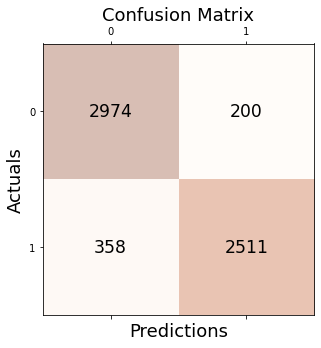

In [241]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [242]:
p = precision_score(y_test, y_pred_class)
p

0.9262264846919955

In [243]:
	
print('Precision: %.3f' % precision_score(y_test, y_pred_class))

Precision: 0.926


In [244]:
	
print('Recall: %.3f' % recall_score(y_test, y_pred_class))

Recall: 0.875


In [245]:
r = recall_score(y_test, y_pred_class)
r

0.8752178459393517

In [246]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_class))

Accuracy: 0.908


In [247]:
	
print('F1 Score: %.3f' % f1_score(y_test, y_pred_class))

F1 Score: 0.900


In [248]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[2974,  200],
       [ 358, 2511]])

In [249]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_class)

0.9076617574052623

In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      3174
         1.0       0.93      0.88      0.90      2869

    accuracy                           0.91      6043
   macro avg       0.91      0.91      0.91      6043
weighted avg       0.91      0.91      0.91      6043



In [251]:
fbeta_score(y_test, y_pred_class, average=None, beta=2)

array([0.92775143, 0.88496511])

In [252]:
beta = 2

In [253]:
f_beta = (1+beta**2) * (p * r) / ((beta**2)*p + r)

In [254]:
f_beta

0.8849651089025163

In [197]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

In [198]:
# X_train_cnn.shape[0]

In [92]:
num_train_data = X_train_cnn.shape[0] 
end_step = np.ceil(num_train_data / 32).astype(np.int32) * 50

In [93]:
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

In [94]:
model_for_pruning = prune_low_magnitude(model, **pruning_params)

Instructions for updating:
Please use `layer.add_weight` method instead.


In [199]:

model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv1d ( (None, 1235, 24)          794       
_________________________________________________________________
prune_low_magnitude_dropout  (None, 1235, 24)          1         
_________________________________________________________________
prune_low_magnitude_flatten_ (None, 29640)             1         
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 1)                 59283     
Total params: 60,079
Trainable params: 30,049
Non-trainable params: 30,030
_________________________________________________________________


In [200]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1, callbacks=callbacks)



2022-10-05 01:25:39.822603: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-10-05 01:25:39.822834: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 01:25:39.824704: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 01:25:39.824778: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI_ERROR_INVALID_PARAMETER


Epoch 1/20
 26/756 [>.............................] - ETA: 5s - loss: 0.5582 - accuracy: 0.8702

2022-10-05 01:25:40.897850: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session started.
2022-10-05 01:25:40.897933: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1408] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 01:25:40.898084: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1447] function cupti_interface_->ActivityRegisterCallbacks( AllocCuptiActivityBuffer, FreeCuptiActivityBuffer)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-10-05 01:25:40.904820: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1430] function cupti_interface_->EnableCallback( 0 , subscriber_, CUPTI_CB_DOMAIN_DRIVER_API, cbid)failed with error CUPTI_ERROR_INVALID_PARAMETER
2022-10-05 01:25:40.905106: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:216]  GpuTracer has collected 0 callback api events and 0 activity events.
2022-10-05 01:25:40.907813: I ten

756/756 [==============================] - 4s 5ms/step - loss: 0.5746 - accuracy: 0.8820
Epoch 2/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5734 - accuracy: 0.8852
Epoch 3/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5747 - accuracy: 0.8827
Epoch 4/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5744 - accuracy: 0.8843
Epoch 5/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5740 - accuracy: 0.8845
Epoch 6/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5739 - accuracy: 0.8833
Epoch 7/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5758 - accuracy: 0.8788
Epoch 8/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5748 - accuracy: 0.8809
Epoch 9/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5750 - accuracy: 0.8813
Epoch 10/20
756/756 [==============================] - 4s 5ms/step - loss: 0.5759 - accuracy: 0.8773
Epoch 11/2

In [201]:
y_pred = model_for_pruning.predict(X_test_cnn)

In [202]:
y_pred

array([[0.02805084],
       [0.86258537],
       [0.9990305 ],
       ...,
       [1.        ],
       [0.99999964],
       [0.20160383]], dtype=float32)

In [203]:
y_pred_class = model_for_pruning.predict_classes(X_test_cnn)

In [204]:
y_pred_class

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [205]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_class)

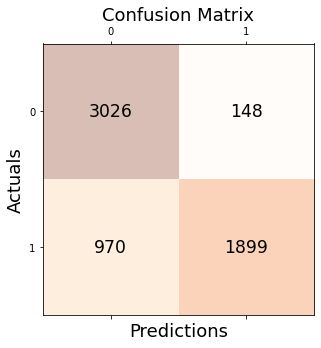

In [206]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [207]:
p = precision_score(y_test, y_pred_class)
p

0.9276990718124084

In [208]:
	
print('Precision: %.3f' % precision_score(y_test, y_pred_class))

Precision: 0.928


In [209]:
print('Recall: %.3f' % recall_score(y_test, y_pred_class))

Recall: 0.662


In [210]:
r = recall_score(y_test, y_pred_class)
r

0.6619031021261763

In [211]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_class))

Accuracy: 0.815


In [212]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred_class))

F1 Score: 0.773


In [213]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[3026,  148],
       [ 970, 1899]])

In [214]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_class)

0.8149925533675327

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84      3174
         1.0       0.93      0.66      0.77      2869

    accuracy                           0.81      6043
   macro avg       0.84      0.81      0.81      6043
weighted avg       0.84      0.81      0.81      6043



In [216]:
fbeta_score(y_test, y_pred_class, average=None, beta=2)

array([0.90642224, 0.7021371 ])

In [217]:
# tf.saved_model.save(model_for_pruning, "/data/space1/BooleanLab/TinyML/saved-model_prune" )

In [223]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model)

# _, pruned_keras_file = tempfile.mkstemp('.h5')
# _, pruned_keras_file = "/data/space1/BooleanLab/TinyML/test_prune.h5"
# tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
tf.keras.models.save_model(model_for_export, "/data/space1/BooleanLab/TinyML/test_prune", include_optimizer=False)
# print('Saved pruned Keras model to:', pruned_keras_file)

INFO:tensorflow:Assets written to: /data/space1/BooleanLab/TinyML/test_prune/assets


INFO:tensorflow:Assets written to: /data/space1/BooleanLab/TinyML/test_prune/assets


In [219]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
pruned_tflite_model = converter.convert()

_, pruned_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_tflite_file, 'wb') as f:
  f.write(pruned_tflite_model)

print('Saved pruned TFLite model to:', pruned_tflite_file)

2022-10-05 01:27:44.676404: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 4
2022-10-05 01:27:44.676628: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-10-05 01:27:44.677787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 01:27:44.678353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 01:27:44.678909: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapa

Saved pruned TFLite model to: /tmp/tmpk_glji1z.tflite


In [220]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [221]:
# print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
# print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))
print("Size of gzipped pruned TFlite model: %.2f bytes" % (get_gzipped_model_size(pruned_tflite_file)))

Size of gzipped pruned TFlite model: 37196.00 bytes


In [260]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
quantized_and_pruned_tflite_model = converter.convert()

# _, quantized_and_pruned_tflite_file = tempfile.mkstemp('.tflite')

with open("/data/space1/BooleanLab/TinyML/final2.tflite", 'wb') as f:
  f.write(quantized_and_pruned_tflite_model)

# print('Saved quantized and pruned TFLite model to:', quantized_and_pruned_tflite_file)

# # print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
# print("Size of gzipped pruned and quantized TFlite model: %.2f bytes" % (get_gzipped_model_size(quantized_and_pruned_tflite_file)))

2022-10-05 02:55:47.191756: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 4
2022-10-05 02:55:47.191948: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-10-05 02:55:47.193152: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 02:55:47.193764: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-05 02:55:47.194369: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:81:00.0 name: GeForce GTX 1080 Ti computeCapa